In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
import sys
sys.path.append('/content/drive/MyDrive/deliverables/code/helper') #update path needed

In [18]:
from data_prep import CreditDataProcessor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from train_test import SARIMAXModel
from anomaly_detection import AnomalyDetection

In [19]:
file_path = "/content/drive/MyDrive/deliverables/code/data/data4columbia_credit.csv" #update path needed
company_code = "22328d65a8ae"
train_ratio = 0.9

data_processor = CreditDataProcessor(file_path, train_ratio)
data_processor.load_data()
data_processor.get_company_data(company_code)

In [20]:
train = data_processor.train.set_index("ds")["y"].values
test = data_processor.test.set_index("ds")["y"].values

Test rmse on normal scale: 79302.798


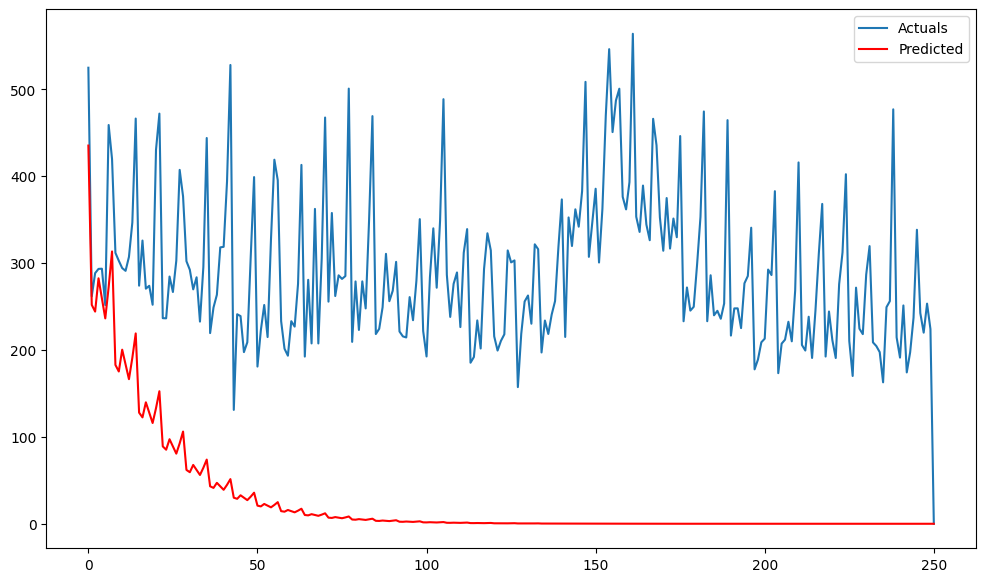

In [21]:
# Pre-defined parameters
my_order = (1, 0, 0)
my_seasonal_order = (1, 0, 0, 7)

# Assuming you have defined train_log and test_log

# Create an instance of SARIMAXPredictor
predictor = SARIMAXModel(train, test, my_order, my_seasonal_order)

# Fit the model, make predictions, and evaluate errors
predictor.fit_predict()
predictor.evaluate_errors()

# Plot the results
predictor.plot_results()

In [22]:
eval_df = data_processor.test.set_index("ds")
eval_df.loc[:,"prediction"] = predictor.predictions
eval_df = eval_df.rename(columns={"y":"actual"})

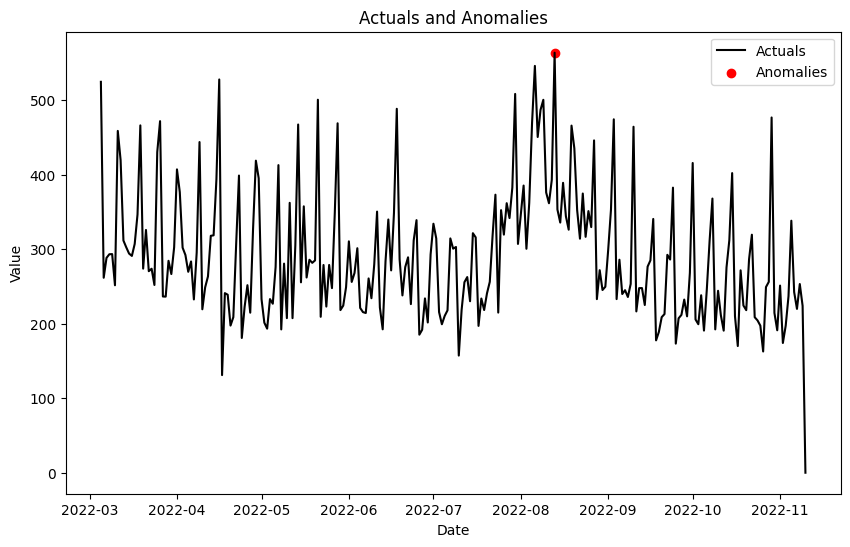

In [23]:
anomaly = AnomalyDetection(eval_df)
anomaly.detect_anomalies()
anomaly.plot_anomalies()